In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, kruskal
import datetime

from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples

# Read data & basic analysis



In [ ]:
yulu_data = pd.read_csv('bike_sharing.csv')

In [ ]:
yulu_data.shape


(10886, 12)

In [ ]:
yulu_data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu_data['datetime'] = pd.to_datetime(yulu_data['datetime']) 

In [ ]:
yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
yulu_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
yulu_data.isna().sum()/len(yulu_data)

# no missing values

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

**Univariate Analysis**

In [ ]:
yulu_data['season'].value_counts(normalize = True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [ ]:
yulu_data['holiday'].value_counts(normalize = True)*100


0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [ ]:
yulu_data['workingday'].value_counts(normalize = True)*100


1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [ ]:
yulu_data['weather'].value_counts(normalize = True)*100


1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

In [ ]:
# yulu_data['windspeed'].value_counts(normalize = True)*100


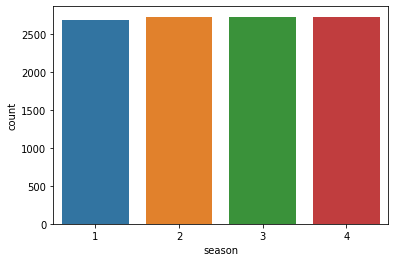

In [ ]:
sns.countplot(x='season', data = yulu_data)


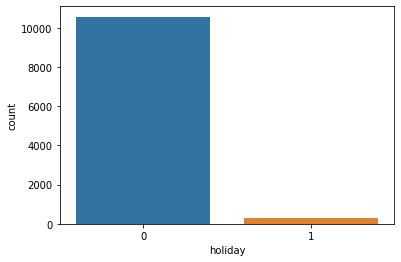

In [ ]:
sns.countplot(x='holiday', data = yulu_data)


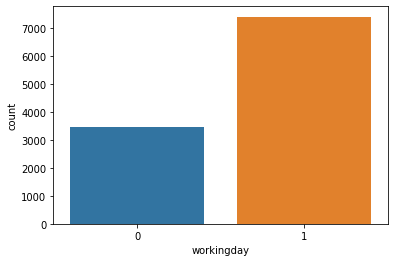

In [ ]:
sns.countplot(x='workingday', data = yulu_data)


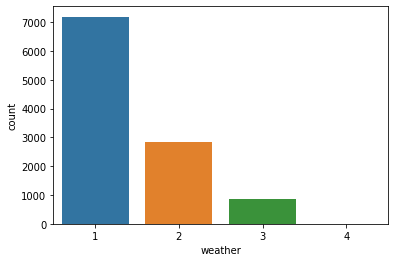

In [ ]:
sns.countplot(x='weather', data = yulu_data)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


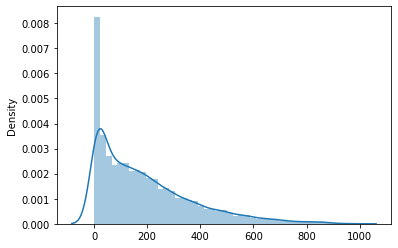

In [ ]:
sns.distplot(x = yulu_data['count'])


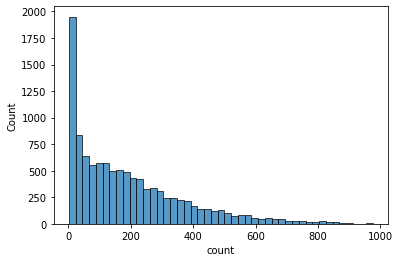

In [ ]:
sns.histplot(x = yulu_data['count'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


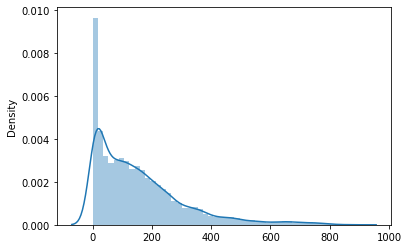

In [ ]:
sns.distplot(x = yulu_data['registered'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


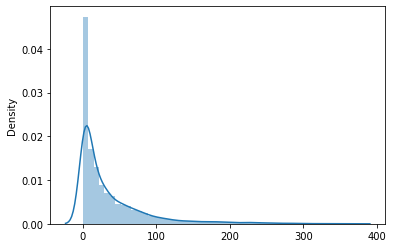

In [ ]:
sns.distplot(x = yulu_data['casual'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


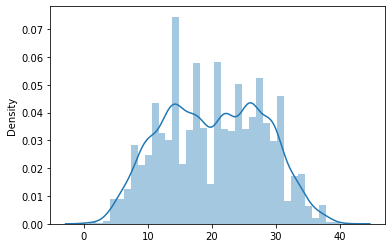

In [ ]:
sns.distplot(x = yulu_data['temp'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


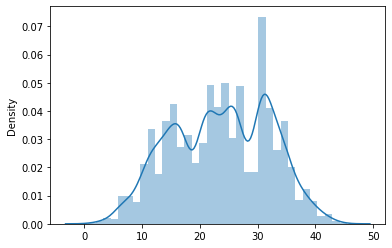

In [ ]:
sns.distplot(x = yulu_data['atemp'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


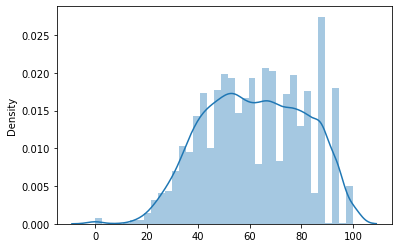

In [ ]:
sns.distplot(x = yulu_data['humidity'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


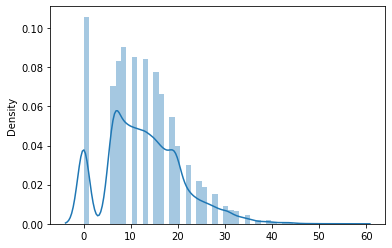

In [ ]:
sns.distplot(x = yulu_data['windspeed'])


**Bivariate Analyis**

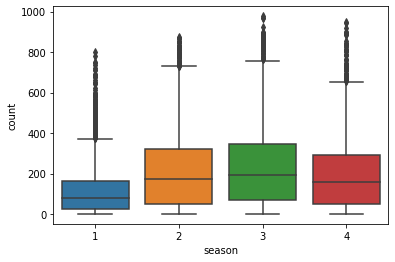

In [ ]:
sns.boxplot(x = "season", y = "count", data = yulu_data)


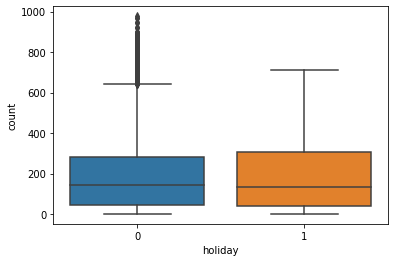

In [ ]:
sns.boxplot(x = "holiday", y = "count", data = yulu_data)

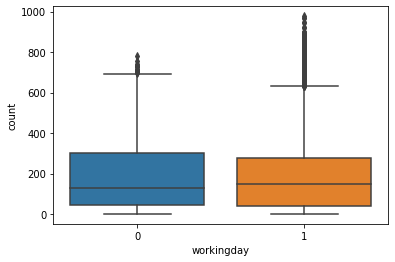

In [ ]:
sns.boxplot(x = "workingday", y = "count", data = yulu_data)

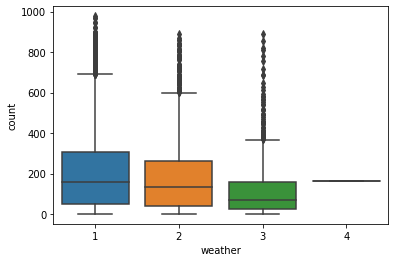

In [ ]:
sns.boxplot(x = "weather", y = "count", data = yulu_data)

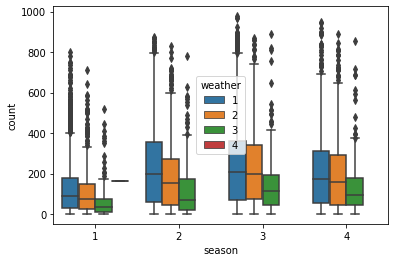

In [ ]:
sns.boxplot(x = "season", y = "count",hue = 'weather',data = yulu_data)

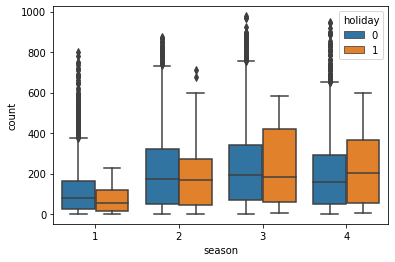

In [ ]:
sns.boxplot(x = "season", y = "count",hue = 'holiday',data = yulu_data)


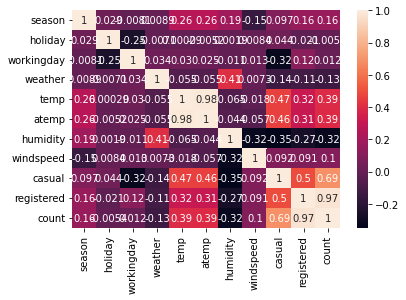

In [ ]:
sns.heatmap(yulu_data.corr(),annot=True)
plt.show()

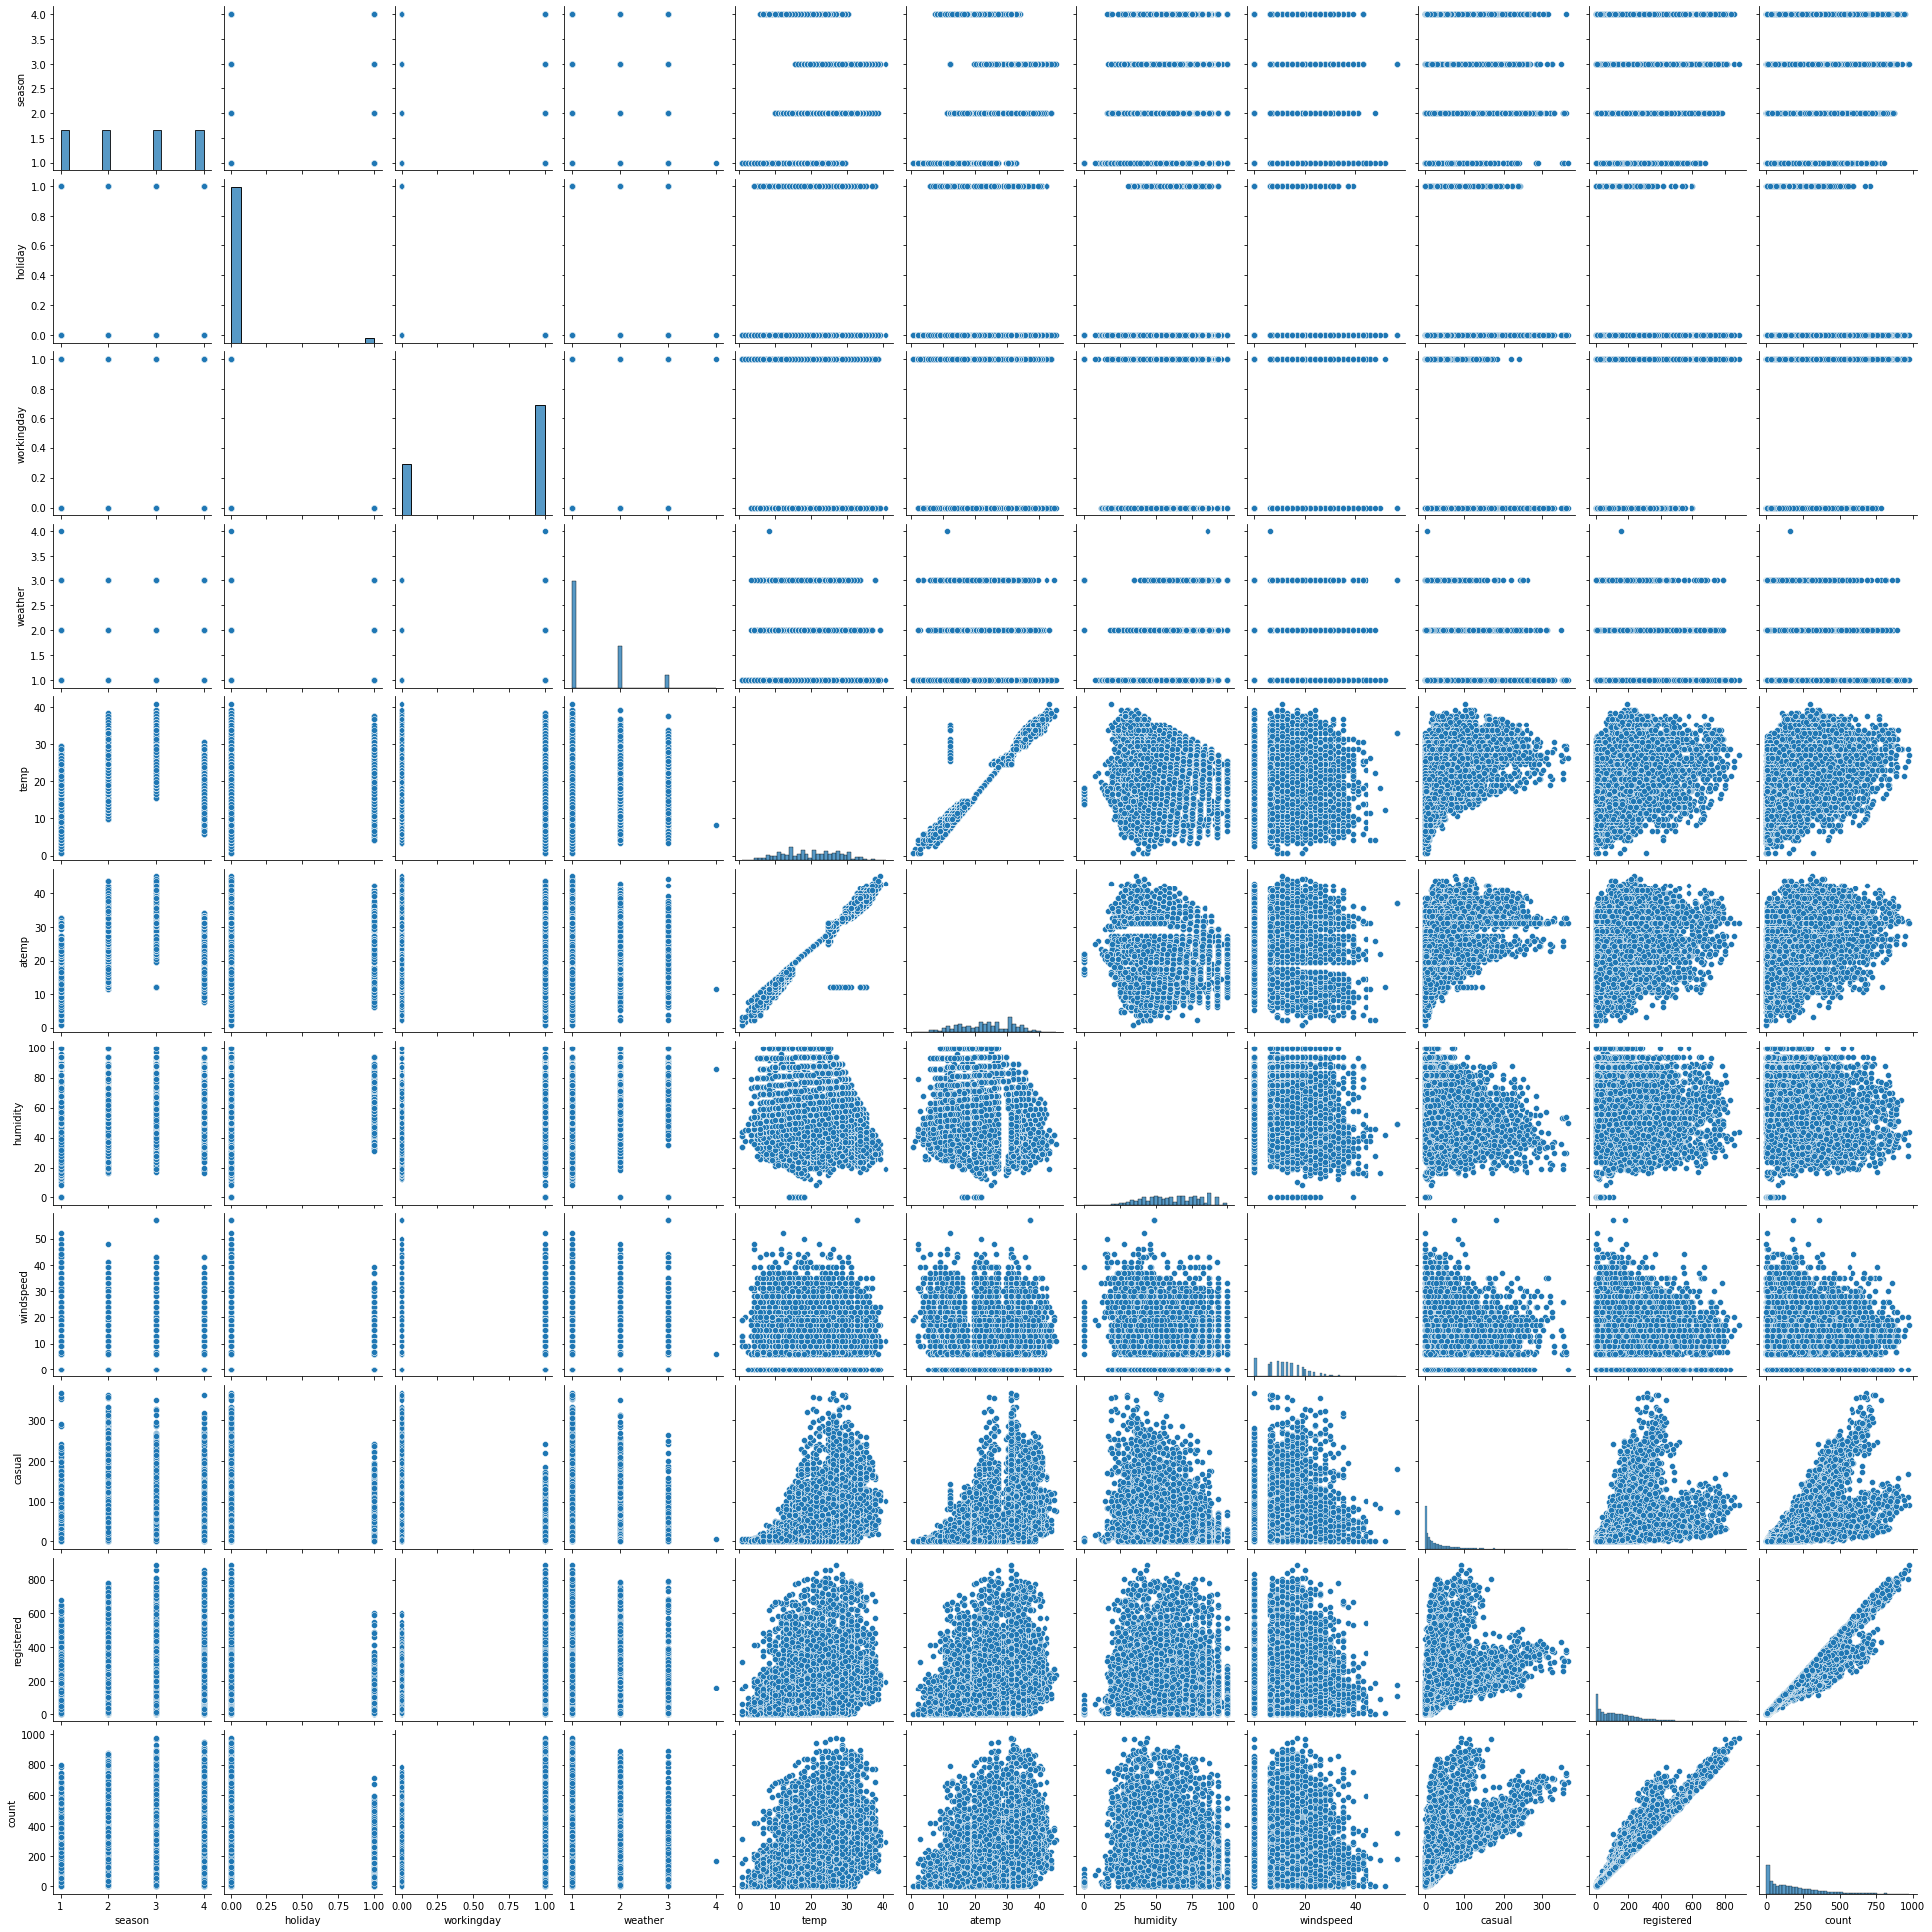

In [ ]:
# Pairplot
sns.pairplot(yulu_data)

**Hypotheses Testing**

In [ ]:
yulu_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# H0 : Working Day has no effect on number of electric cycles rented i.e working day and count are independent variables
# Ha : Working Day has effect on number of electric cycles rented i.e count is dependent on working day

In [ ]:
# We will use t statistic and first look for its assumptions check.

In [ ]:
# both samples should be normally distributed for ttest

In [ ]:
grp1 = yulu_data.loc[yulu_data['workingday'] == 0,'count']
grp2 = yulu_data.loc[yulu_data['workingday'] == 1,'count']


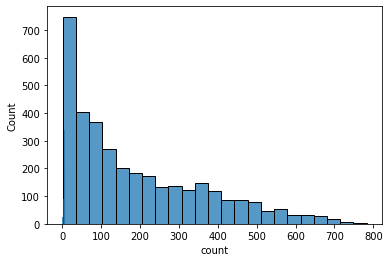

In [ ]:
sns.histplot(grp1)
sns.histplot(np.log(grp1))

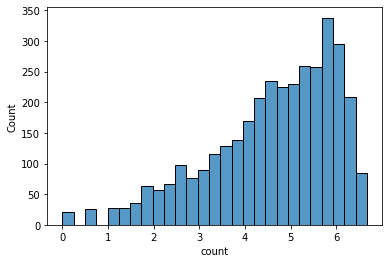

In [75]:
sns.histplot(np.log(grp1))

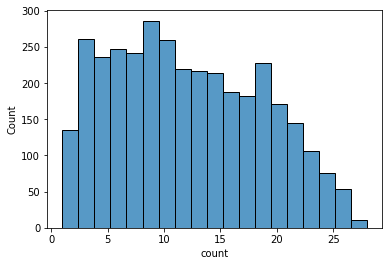

In [76]:
sns.histplot(np.sqrt(grp1))

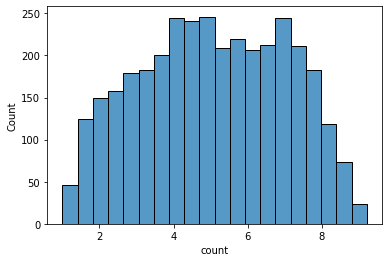

In [77]:
sns.histplot(np.cbrt(grp1))


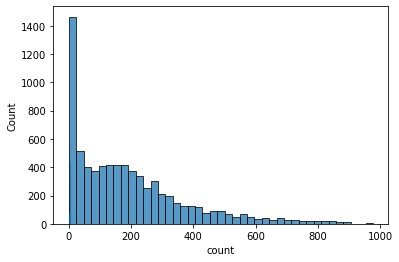

In [ ]:
sns.histplot(grp2)
sns.histplot(np.log(grp2))

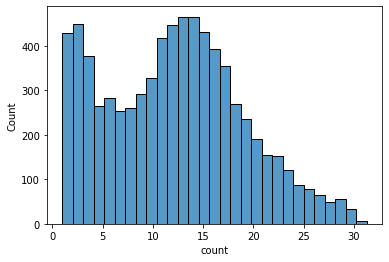

In [82]:
sns.histplot(np.sqrt(grp2))


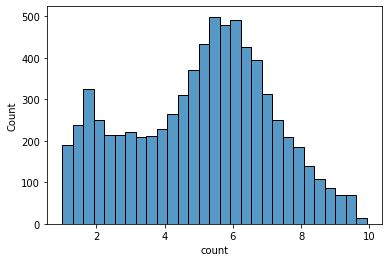

In [83]:
sns.histplot(np.cbrt(grp2))


[]

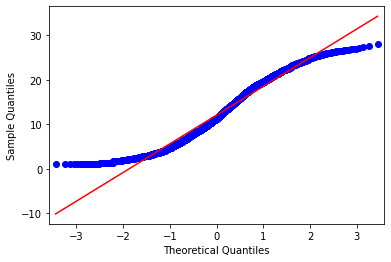

In [79]:
qqplot(np.sqrt(grp1),line = 'r')
plt.plot()

[]

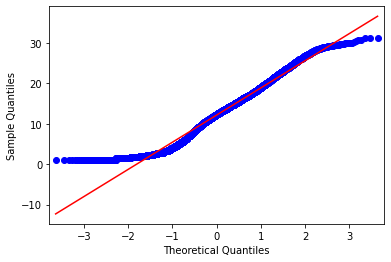

In [84]:
qqplot(np.sqrt(grp2),line = 'r')
plt.plot()

In [85]:
print(shapiro(np.sqrt(grp1)))
print(shapiro(np.sqrt(grp2)))

ShapiroResult(statistic=0.9658713936805725, pvalue=6.166544088743618e-28)
ShapiroResult(statistic=0.9736786484718323, pvalue=8.141092182514257e-35)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [86]:
levene(np.sqrt(grp1),np.sqrt(grp2))

LeveneResult(statistic=0.017810394224838214, pvalue=0.8938355521989265)

In [ ]:
# sample data is highly skewed.
# qqplots suggest sample data does not follow normal distribution.
# since p-value in shapiro test is less than 0.05 hence we reject the Null Hypothesis. This means that the samples data does not come from a normal distribution.
# since p-value in levene test is greater than 0.05 hence we fail to reject the Null Hypotheses. This implies that both sample data have similar variances.

In [87]:
ttest_ind(np.sqrt(grp1),np.sqrt(grp2))

Ttest_indResult(statistic=-0.34827565362823426, pvalue=0.7276399120700004)

In [ ]:
# Taking significance level = 0.05, inference analysis is as follows:
# p-value > 0.05 thus, we fail to reject the null hypothesis; hence, working day has no impact on count of bikes.

In [ ]:
# H0 : Season has no effect on number of electric cycles rented i.e season and count are independent variables
# Ha : Season has effect on number of electric cycles rented i.e count is dependent on Season

In [ ]:
season1_count = yulu_data.loc[yulu_data['season'] == 1,'count']
season2_count = yulu_data.loc[yulu_data['season'] == 2,'count']
season3_count = yulu_data.loc[yulu_data['season'] == 3,'count']
season4_count = yulu_data.loc[yulu_data['season'] == 4,'count']

In [ ]:
# ANOVA Assumptions


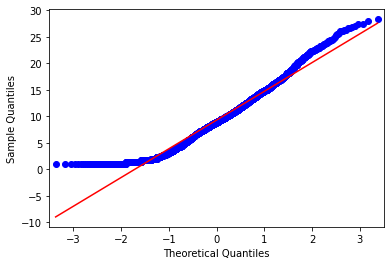

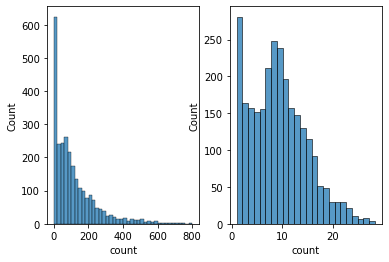

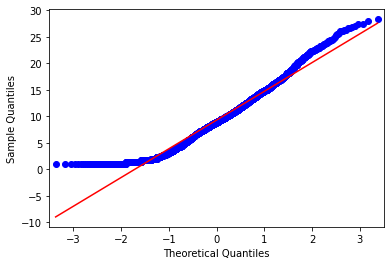

In [105]:
plt.subplot(121)
sns.histplot(season1_count)

plt.subplot(122)
sns.histplot(np.sqrt(season1_count))

# plt.subplot(133)
qqplot(np.sqrt(season1_count),line = 'r')



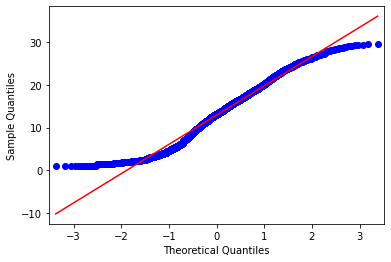

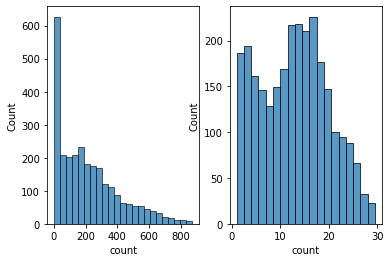

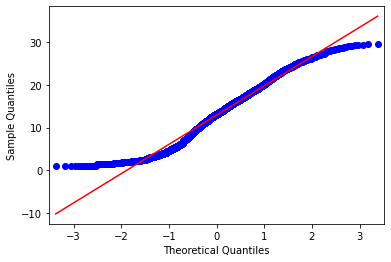

In [106]:
plt.subplot(121)
sns.histplot(season2_count)

plt.subplot(122)
sns.histplot(np.sqrt(season2_count))

# plt.subplot(133)
qqplot(np.sqrt(season2_count),line = 'r')



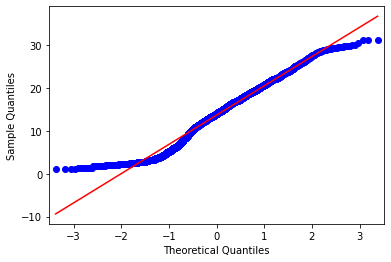

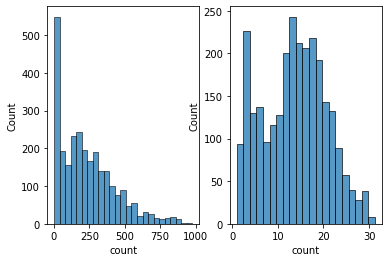

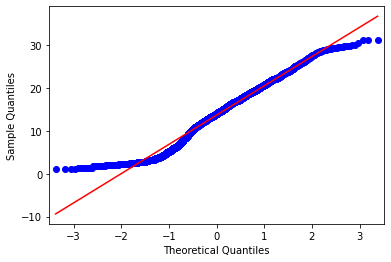

In [107]:
plt.subplot(121)
sns.histplot(season3_count)

plt.subplot(122)
sns.histplot(np.sqrt(season3_count))

# plt.subplot(133)
qqplot(np.sqrt(season3_count),line = 'r')



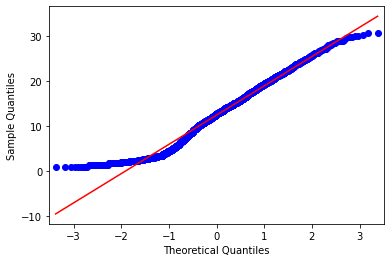

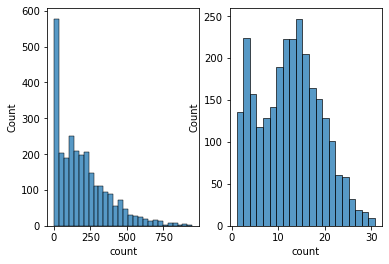

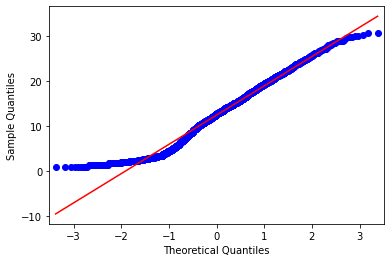

In [108]:
plt.subplot(121)
sns.histplot(season4_count)

plt.subplot(122)
sns.histplot(np.sqrt(season4_count))

# plt.subplot(133)
qqplot(np.sqrt(season4_count),line = 'r')



In [98]:
print(shapiro(np.sqrt(season1_count)))
print(shapiro(np.sqrt(season2_count)))
print(shapiro(np.sqrt(season3_count)))
print(shapiro(np.sqrt(season4_count)))

ShapiroResult(statistic=0.9655001759529114, pvalue=7.321354952483793e-25)
ShapiroResult(statistic=0.9733254313468933, pvalue=3.479960550017308e-22)
ShapiroResult(statistic=0.9764497876167297, pvalue=7.441774809479496e-21)
ShapiroResult(statistic=0.977200448513031, pvalue=1.6083493035327932e-20)


In [109]:
levene(np.sqrt(season1_count),np.sqrt(season2_count),np.sqrt(season3_count),np.sqrt(season4_count))


LeveneResult(statistic=77.29245417635002, pvalue=1.8167900813150485e-49)

In [ ]:
# sample data is highly skewed.
# qqplots suggest sample data does not follow normal distribution.
# since p-value in shapiro test is less than 0.05 hence we reject the Null Hypothesis. This means that the samples data does not come from a normal distribution.
# since p-value in levene test is less than 0.05 hence we reject the Null Hypotheses. This implies that sample data do not have similar variances.

In [88]:
# season1_count

In [ ]:
f_oneway(season1_count,season2_count,season3_count,season4_count)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [ ]:
# p-value < 0.05, thus we reject the null hypothesis; hence count of cycles is different in different seasons.

In [ ]:
# Since ANOVA assumptions failed so trying kruskal test here

In [112]:
kruskal(season1_count,season2_count,season3_count,season4_count)


KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

In [ ]:
# p-value < 0.05, thus we reject the null hypothesis; hence count of cycles is different in different seasons.
#  Season has effect on number of electric cycles rented i.e season and count are dependent variables

In [ ]:
# H0 : Weather has no effect on number of electric cycles rented i.e Weather and count are independent variables
# Ha : Weather has effect on number of electric cycles rented i.e count is dependent on Weather

In [ ]:
# Assumptions of ANOVA

In [ ]:
weather1_count = yulu_data.loc[yulu_data['weather'] == 1,'count']
weather2_count = yulu_data.loc[yulu_data['weather'] == 2,'count']
weather3_count = yulu_data.loc[yulu_data['weather'] == 3,'count']
weather4_count = yulu_data.loc[yulu_data['weather'] == 4,'count']

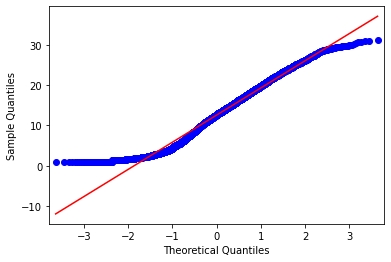

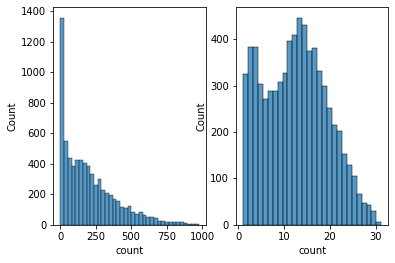

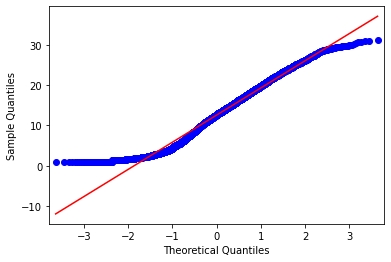

In [128]:
plt.subplot(121)
sns.histplot(weather1_count)

plt.subplot(122)
sns.histplot(np.sqrt(weather1_count))

# plt.subplot(133)
qqplot(np.sqrt(weather1_count),line = 'r')


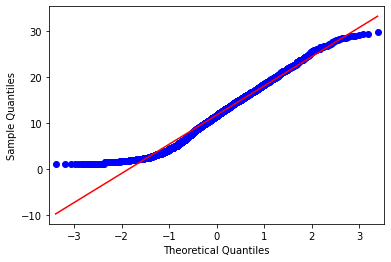

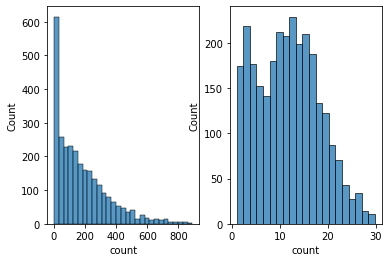

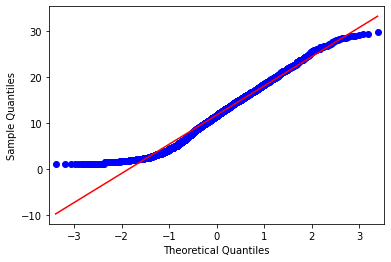

In [125]:
plt.subplot(121)
sns.histplot(weather2_count)

plt.subplot(122)
sns.histplot(np.sqrt(weather2_count))

# plt.subplot(133)
qqplot(np.sqrt(weather2_count),line = 'r')


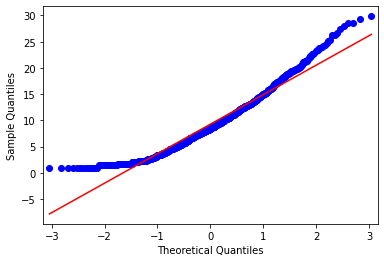

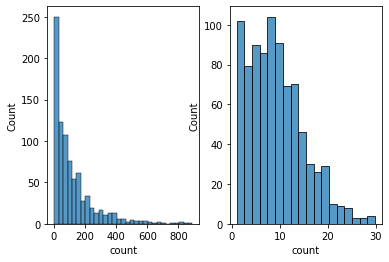

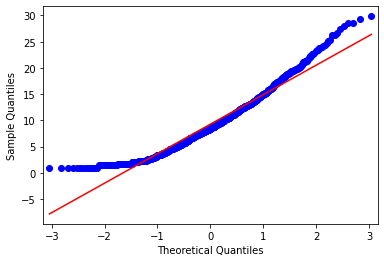

In [124]:
plt.subplot(121)
sns.histplot(weather3_count)

plt.subplot(122)
sns.histplot(np.sqrt(weather3_count))

# plt.subplot(133)
qqplot(np.sqrt(weather3_count),line = 'r')


In [121]:
weather4_count
# plt.subplot(121)
# sns.histplot(weather4_count)

# plt.subplot(122)
# sns.histplot(np.sqrt(weather4_count))

# # plt.subplot(133)
# qqplot(np.sqrt(weather4_count),line = 'r')



5631    164
Name: count, dtype: int64

In [115]:
print(shapiro(np.sqrt(weather1_count)))
print(shapiro(np.sqrt(weather2_count)))
print(shapiro(np.sqrt(weather3_count)))
# print(shapiro(np.sqrt(weather4_count))) not applicable since data points < 3

ShapiroResult(statistic=0.9760211706161499, pvalue=4.4063875938313776e-33)
ShapiroResult(statistic=0.9759206175804138, pvalue=1.7380839796102476e-21)
ShapiroResult(statistic=0.950975775718689, pvalue=2.660805773033615e-16)


In [129]:
levene(np.sqrt(weather1_count),np.sqrt(weather2_count),np.sqrt(weather3_count))


LeveneResult(statistic=41.24266409575869, pvalue=1.4324573823422981e-18)

In [ ]:
# sample data is highly skewed.
# qqplots suggest sample data does not follow normal distribution.
# since p-value in shapiro test is less than 0.05 hence we reject the Null Hypothesis. This means that the samples data does not come from a normal distribution.
# since p-value in levene test is less than 0.05 hence we reject the Null Hypotheses. This implies that sample data do not have similar variances.

In [113]:
# weather1_count

In [ ]:
f_oneway(weather1_count, weather2_count, weather3_count, weather4_count)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [ ]:
# p-value < 0.05, thus we reject the null hypothesis; hence count of bikes is different in different weathers

In [117]:
kruskal(weather1_count, weather2_count, weather3_count, weather4_count)


KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

In [ ]:
# p-value < 0.05, thus we reject the null hypothesis; hence count of bikes is different in different weathers
#  Weather has effect on number of electric cycles rented i.e count is dependent on Weather


In [ ]:
# H0 : Season has no effect on weather i.e Weather and season are independent variables
# Ha : Season has effect on weather i.e weather is dependent on season

In [ ]:
season_weather = pd.crosstab(index = yulu_data['season'],columns = yulu_data['weather'])

In [ ]:
season_weather

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi2_contingency(season_weather)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [ ]:
# p-value < 0.05, thus, we can reject the null hypotheses; hence season affects weather.